<a href="https://colab.research.google.com/github/hrshwrdhn/ai_cheat/blob/main/logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import all modules

In [3]:
# Imports
import torch
import torchvision
from torchvision.datasets import QMNIST

# Download and explore dataset

In [4]:
# Download training dataset
dataset = QMNIST(root='data1/', download=True)

In [5]:
dataset

Dataset QMNIST
    Number of datapoints: 60000
    Root location: data1/
    Split: train

In [6]:
len(dataset)

60000

In [7]:
#download test dataset
test_dataset = QMNIST(root='data1/', train=False,download = True)
print(len(test_dataset))


Processing...
60000


In [8]:
print(len(test_dataset))

60000


In [9]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F85A8D09910>, 5)

4


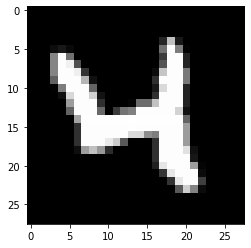

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(dataset[20][0], cmap='gray')
print(dataset[20][1])


# tranform DataLoader

In [11]:
import torchvision.transforms as transforms
dataset = QMNIST(root='data1/', 
                train=True,
                transform=transforms.ToTensor())

In [12]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [13]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6078, 0.9961, 0.3490, 0.0000],
        [0.0000, 0.5490, 0.9961, 0.7490, 0.0039],
        [0.0000, 0.0392, 0.7451, 0.9961, 0.2706],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


The values range from 0 to 1, with 0 representing black, 1 white, and the values in between different shades of grey. We can also plot the tensor as an image using plt.imshow.

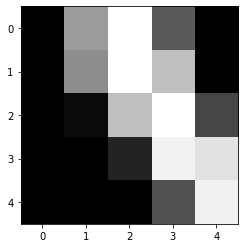

In [14]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

### split dataset


In [15]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

### dataloader

In [16]:
from torch.utils.data import DataLoader
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

# Model

### USe `torch.nn` to create layer 


In [17]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [18]:
# check model parameter
print(model.weight.shape)
model.weight


torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0265,  0.0354,  0.0151,  ..., -0.0032,  0.0024, -0.0296],
        [ 0.0343,  0.0250,  0.0178,  ..., -0.0325,  0.0238, -0.0036],
        [ 0.0183,  0.0085,  0.0243,  ..., -0.0322,  0.0334,  0.0317],
        ...,
        [ 0.0243, -0.0064,  0.0128,  ..., -0.0180,  0.0066, -0.0191],
        [ 0.0096,  0.0209, -0.0247,  ...,  0.0167,  0.0047,  0.0036],
        [ 0.0298,  0.0202,  0.0105,  ..., -0.0298, -0.0211,  0.0158]],
       requires_grad=True)

In [19]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0023,  0.0341, -0.0353,  0.0114, -0.0218, -0.0301,  0.0125,  0.0327,
        -0.0249,  0.0311], requires_grad=True)

In [20]:
class QMnistModel(nn.Module):
   def __init__(self):
       super().__init__()
       self.linear = nn.Linear(input_size, num_classes)
      
   def forward(self, xb):
       xb = xb.reshape(-1, 784)
       out = self.linear(xb)
       return out
  
model = QMnistModel()


Inside the `__init__` constructor method, we instantiate the weights and biases using `nn.Linear`. And inside the `forward` method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into `self.linear`.

`xb.reshape(-1, 28*28)` indicates to PyTorch that we want a *view* of the `xb` tensor with two dimensions. The length along the 2nd dimension is 28\*28 (i.e., 784). One argument to `.reshape` can be set to `-1` (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

Note that the model no longer has `.weight` and `.bias` attributes (as they are now inside the `.linear` attribute), but it does have a `.parameters` method that returns a list containing the weights and bias.

In [21]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [22]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0318, -0.0338,  0.0254,  ..., -0.0183,  0.0084, -0.0259],
         [ 0.0277,  0.0045, -0.0228,  ...,  0.0053, -0.0033,  0.0128],
         [-0.0095,  0.0125,  0.0033,  ..., -0.0153, -0.0020,  0.0125],
         ...,
         [ 0.0056, -0.0274,  0.0104,  ...,  0.0300, -0.0145,  0.0168],
         [ 0.0260,  0.0287, -0.0199,  ..., -0.0353,  0.0034,  0.0343],
         [-0.0306, -0.0281,  0.0060,  ..., -0.0266, -0.0210,  0.0006]],
        requires_grad=True), Parameter containing:
 tensor([-0.0271,  0.0073,  0.0220,  0.0120,  0.0134, -0.0122, -0.0344, -0.0142,
          0.0009,  0.0020], requires_grad=True)]

In [23]:
## check prediction on model

## check prediction on model

In [24]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1982, -0.0835, -0.0521,  0.1153,  0.1224,  0.1637,  0.2612, -0.3023,
          0.6538,  0.3202],
        [-0.2034, -0.1405,  0.0535,  0.0161,  0.1386,  0.1290,  0.2120,  0.0603,
          0.2785, -0.0219]])


# softmax function, change logic score to probability

In [26]:
import torch.nn.functional as F


In [27]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1028, 0.0776, 0.0801, 0.0947, 0.0953, 0.0993, 0.1095, 0.0623, 0.1622,
         0.1162],
        [0.0767, 0.0817, 0.0992, 0.0955, 0.1080, 0.1069, 0.1162, 0.0998, 0.1242,
         0.0919]])
Sum:  0.9999999403953552


In [29]:
### ouput is class having maximum probabilty

In [30]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 6, 8, 8, 1, 6, 8, 6, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 4, 8, 9, 8, 8, 8, 8, 8, 0, 8, 6, 8, 8, 8, 8, 2, 3, 8, 8,
        6, 6, 8, 7, 9, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 6, 8, 8, 9, 8, 4, 8, 8, 6,
        9, 6, 9, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 6, 8, 8, 6, 6, 5, 6, 8, 8, 0, 6,
        0, 8, 6, 8, 8, 9, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 6,
        6, 6, 8, 8, 8, 8, 6, 8])
tensor([0.1622, 0.1242, 0.1329, 0.1227, 0.1727, 0.1512, 0.1689, 0.1509, 0.1193,
        0.1303, 0.1405, 0.1361, 0.1479, 0.1659, 0.1445, 0.1281, 0.1201, 0.1922,
        0.1369, 0.1224, 0.1475, 0.1213, 0.1415, 0.1418, 0.1484, 0.1639, 0.1196,
        0.1640, 0.1132, 0.1262, 0.1371, 0.1467, 0.1712, 0.1219, 0.1430, 0.1227,
        0.1234, 0.1154, 0.1446, 0.1504, 0.1483, 0.1741, 0.1377, 0.1159, 0.1141,
        0.1560, 0.1413, 0.1490, 0.1324, 0.1358, 0.1526, 0.1274, 0.1153, 0.1463,
        0.1231, 0.1278, 0.1514, 0.1715, 0.1532, 0.1809, 0.1482, 0.1338, 0.1435,
       

## Evaluation Metric and Loss Function

In [34]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [35]:
accuracy(outputs, labels)

tensor(0.1328)

In [36]:
loss_fn = F.cross_entropy

In [37]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2704, grad_fn=<NllLossBackward>)


# training

Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here's what it looks like in pseudocode:

for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
 
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
 
    # Log epoch, loss & metrics for inspection

Some parts of the training loop are specific the specific problem we're solving (e.g. loss function, metrics etc.) whereas others are generic and can be applied to any deep learning problem.

We'll include the problem-independent parts within a function called fit, which will be used to train the model. The problem-specific parts will be implemented by adding new methods to the nn.Module class.

In [38]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [39]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

## update all function in a class

In [40]:
class QMnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = QMnistModel()

In [42]:
result0 = evaluate(model, val_loader)
result0


{'val_acc': 0.14725078642368317, 'val_loss': 2.2894954681396484}

In [43]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9194, val_acc: 0.6654
Epoch [1], val_loss: 1.6548, val_acc: 0.7602
Epoch [2], val_loss: 1.4580, val_acc: 0.7812
Epoch [3], val_loss: 1.3094, val_acc: 0.7986
Epoch [4], val_loss: 1.1952, val_acc: 0.8098


In [ ]:
history1 = fit(50, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1116, val_acc: 0.8020
Epoch [1], val_loss: 1.0399, val_acc: 0.8121
Epoch [2], val_loss: 0.9812, val_acc: 0.8174
Epoch [3], val_loss: 0.9321, val_acc: 0.8216
Epoch [4], val_loss: 0.8908, val_acc: 0.8250
Epoch [5], val_loss: 0.8553, val_acc: 0.8285
Epoch [6], val_loss: 0.8244, val_acc: 0.8339
Epoch [7], val_loss: 0.7974, val_acc: 0.8355
Epoch [8], val_loss: 0.7735, val_acc: 0.8380
Epoch [9], val_loss: 0.7523, val_acc: 0.8399
Epoch [10], val_loss: 0.7332, val_acc: 0.8418
Epoch [11], val_loss: 0.7160, val_acc: 0.8453
Epoch [12], val_loss: 0.7003, val_acc: 0.8472
Epoch [13], val_loss: 0.6859, val_acc: 0.8484
Epoch [14], val_loss: 0.6728, val_acc: 0.8500
Epoch [15], val_loss: 0.6608, val_acc: 0.8510
Epoch [16], val_loss: 0.6496, val_acc: 0.8528
Epoch [17], val_loss: 0.6393, val_acc: 0.8534
Epoch [18], val_loss: 0.6297, val_acc: 0.8546
Epoch [19], val_loss: 0.6207, val_acc: 0.8560
Epoch [20], val_loss: 0.6124, val_acc: 0.8563
Epoch [21], val_loss: 0.6044, val_acc: 0.856

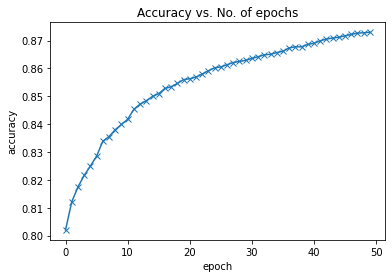

In [ ]:
accuracies = [result['val_acc'] for result in history1]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# do prediction on test image


In [44]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

(<PIL.Image.Image image mode=L size=28x28 at 0x7FC6F19F7E90>, 7)

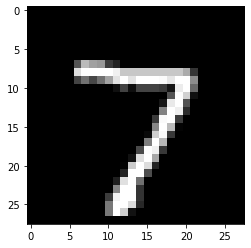

In [45]:
img, label = test_dataset[0]
img
plt.imshow(img, cmap='gray')
#print('Label:', label, ', Predicted:', predict_image(img, model))

In [46]:
import torchvision.transforms as transforms
test_dataset = QMNIST(root='data1/', 
                train=False,
                transform=transforms.ToTensor())

In [47]:
test_loader = DataLoader(test_dataset,batch_size=128)

result = evaluate(model, test_loader)
result

{'val_acc': 0.8087853193283081, 'val_loss': 1.1888304948806763}

# Saving and loading the model

In [48]:
torch.save(model.state_dict(), 'qmnist-logistic.pth')

In [50]:
model2 = QMnistModel()



In [51]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0019, -0.0309, -0.0309,  ..., -0.0280, -0.0278, -0.0166],
                      [ 0.0232, -0.0171,  0.0187,  ..., -0.0203,  0.0018,  0.0337],
                      [-0.0262,  0.0111,  0.0208,  ...,  0.0023, -0.0053, -0.0022],
                      ...,
                      [ 0.0057,  0.0144, -0.0133,  ...,  0.0327,  0.0311, -0.0292],
                      [ 0.0050,  0.0084,  0.0298,  ...,  0.0136, -0.0235,  0.0057],
                      [-0.0045,  0.0327, -0.0154,  ..., -0.0270,  0.0095,  0.0301]])),
             ('linear.bias',
              tensor([-0.0157,  0.0266,  0.0042, -0.0350, -0.0006,  0.0015,  0.0140,  0.0057,
                      -0.0151, -0.0013]))])

In [52]:
evaluate(model2, test_loader)

{'val_acc': 0.15679414570331573, 'val_loss': 2.2829439640045166}

In [ ]:
model2.load_state_dict(torch.load('qmnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0202, -0.0081,  0.0320,  ..., -0.0296, -0.0079, -0.0008],
                      [ 0.0074,  0.0045,  0.0352,  ...,  0.0153, -0.0327,  0.0140],
                      [ 0.0323,  0.0062,  0.0193,  ...,  0.0335,  0.0097,  0.0103],
                      ...,
                      [-0.0081,  0.0135, -0.0011,  ...,  0.0335, -0.0246,  0.0128],
                      [-0.0279,  0.0305, -0.0195,  ...,  0.0022,  0.0078,  0.0026],
                      [-0.0012, -0.0306, -0.0103,  ...,  0.0216, -0.0041,  0.0069]])),
             ('linear.bias',
              tensor([-0.0812,  0.1587, -0.0396, -0.0338,  0.0138,  0.1235, -0.0155,  0.0568,
                      -0.1838, -0.0139]))])

In [53]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_acc': 0.1568373292684555, 'val_loss': 2.282867670059204}